# Results analysis and visualizations

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Load CSV

In [6]:

csv_files = glob.glob("full_experiment/results/*.csv") # Non-Condorcet experiment data
# csv_files = glob.glob("full_experiment_condorcet/results/*.csv") # Condorcet experiment data



# Load and label each dataset
df_list = []
for i, file in enumerate(csv_files):
    splited = file.split('_')
    temp_df = pd.read_csv(file)
    temp_df['Arms'] = int(splited[2])
    # temp_df['Arms'] = int(splited[3]) # If condorcet

    df_list.append(temp_df)

# Combine all into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

df

,Unnamed: 0,Run,Strategy,Correct,Position,Exec_Time,Num_Iterations,Regret_Loss,True_rank,Obtained_rank,Arms
0,0,0,thompson,False,6,1.341319,10000,1655.316134,"[{'arm_68': np.float64(0.994743085612396), 'ar...","[{'arm_65': np.float64(0.5592574964302713), 'a...",100
1,1,1,thompson,True,1,1.701337,10000,1399.323966,"[{'arm_82': np.float64(0.9873012975915471), 'a...","[{'arm_82': np.float64(0.5727151926768049), 'a...",100
2,2,2,thompson,False,15,1.862486,10000,1279.938019,"[{'arm_96': np.float64(0.9986181329661928), 'a...","[{'arm_99': np.float64(0.5577870405456612), 'a...",100
3,3,3,thompson,False,2,1.864166,10000,1331.906914,"[{'arm_76': np.float64(0.979855438098293), 'ar...","[{'arm_54': np.float64(0.5765074939003137), 'a...",100
4,4,4,thompson,False,2,1.857792,10000,1446.678377,"[{'arm_69': np.float64(0.9954948059790554), 'a...","[{'arm_76': np.float64(0.5634047481181239), 'a...",100
...,...,...,...,...,...,...,...,...,...,...,...
2335,385,25,RMED_halving,True,1,0.017905,500,80.513095,"[{'arm_3': np.float64(0.8900772554634299), 'ar...","[{'arm_3': np.float64(0.6303030303030303), 'ar...",5
2336,386,26,RMED_halving,True,1,0.008094,230,41.910642,"[{'arm_1': np.float64(0.9871473560219937), 'ar...","[{'arm_1': np.float64(0.7256637168141593), 'ar...",5
2337,387,27,RMED_halving,True,1,0.016999,500,74.071181,"[{'arm_0': np.float64(0.8601866937258977), 'ar...","[{'arm_0': np.float64(0.6370967741935484), 'ar...",5
2338,388,28,RMED_halving,True,1,0.018003,500,31.562662,"[{'arm_2': np.float64(0.8526430462835928), 'ar...","[{'arm_2': np.float64(0.5881147540983607), 'ar...",5


In [7]:
# Define custom aggregation function for Correct column
def percent_true(series):
    return series.mean() * 100 

# Group and aggregate
summary = df.groupby(['Strategy', 'Arms']).agg({
    'Position': ['mean', 'std'],
    'Exec_Time': ['mean', 'std'],
    'Regret_Loss': ['mean', 'std'],
    'Correct': percent_true
})

# Rename the 'Correct' column properly
summary.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in summary.columns]

# Display result
print(summary)


               Position_mean  Position_std  Exec_Time_mean  Exec_Time_std  \
Strategy Arms                                                               
RMED     5          1.266667      0.583292        0.073985       0.007328   
         10         1.633333      0.964305        0.597056       0.033567   
         20         2.433333      1.755451        4.096502       0.185190   
         50         3.833333      3.779102       46.432248       1.170546   
         100        5.033333      4.468150      450.449913       8.637841   
...                      ...           ...             ...            ...   
ucb      10         1.466667      1.074255        0.015289       0.000718   
         20         2.033333      1.771096        0.031965       0.003434   
         50         2.833333      3.238596        0.089488       0.016132   
         100        6.400000      6.043520        0.316154       0.127859   
         200       12.566667     11.863253        0.980617       0.258614   

In [8]:

summary.to_csv('summary_non_condorcet.csv')

## Load logs

In [17]:

log_files = glob.glob("full_experiment/logs/*.txt") # Non-Condorcet experiment data
# log_files = glob.glob("full_experiment_condorcet/logs/*.txt") # Condorcet experiment data

log_dfs = []

for file in log_files:
    # Extract Strategy and Setup from filename
    base = os.path.basename(file).replace(".txt", "")
    splited = base.split("_")
    strategy = '_'.join(splited[:-1])
    setup = splited[-1]

    # Read the file
    df_log = pd.read_csv(file)

    # Add metadata
    df_log['Strategy'] = strategy
    df_log['Setup'] = int(setup)

    log_dfs.append(df_log)

# Combine all logs
log_df = pd.concat(log_dfs, ignore_index=True)
log_df


,Run,Iteration,Position,Strategy,Setup
0,0,1,1,double_thompson,10
1,0,2,2,double_thompson,10
2,0,3,1,double_thompson,10
3,0,4,1,double_thompson,10
4,0,5,2,double_thompson,10
...,...,...,...,...,...
14905485,29,4996,1,ucb,50
14905486,29,4997,1,ucb,50
14905487,29,4998,1,ucb,50
14905488,29,4999,1,ucb,50


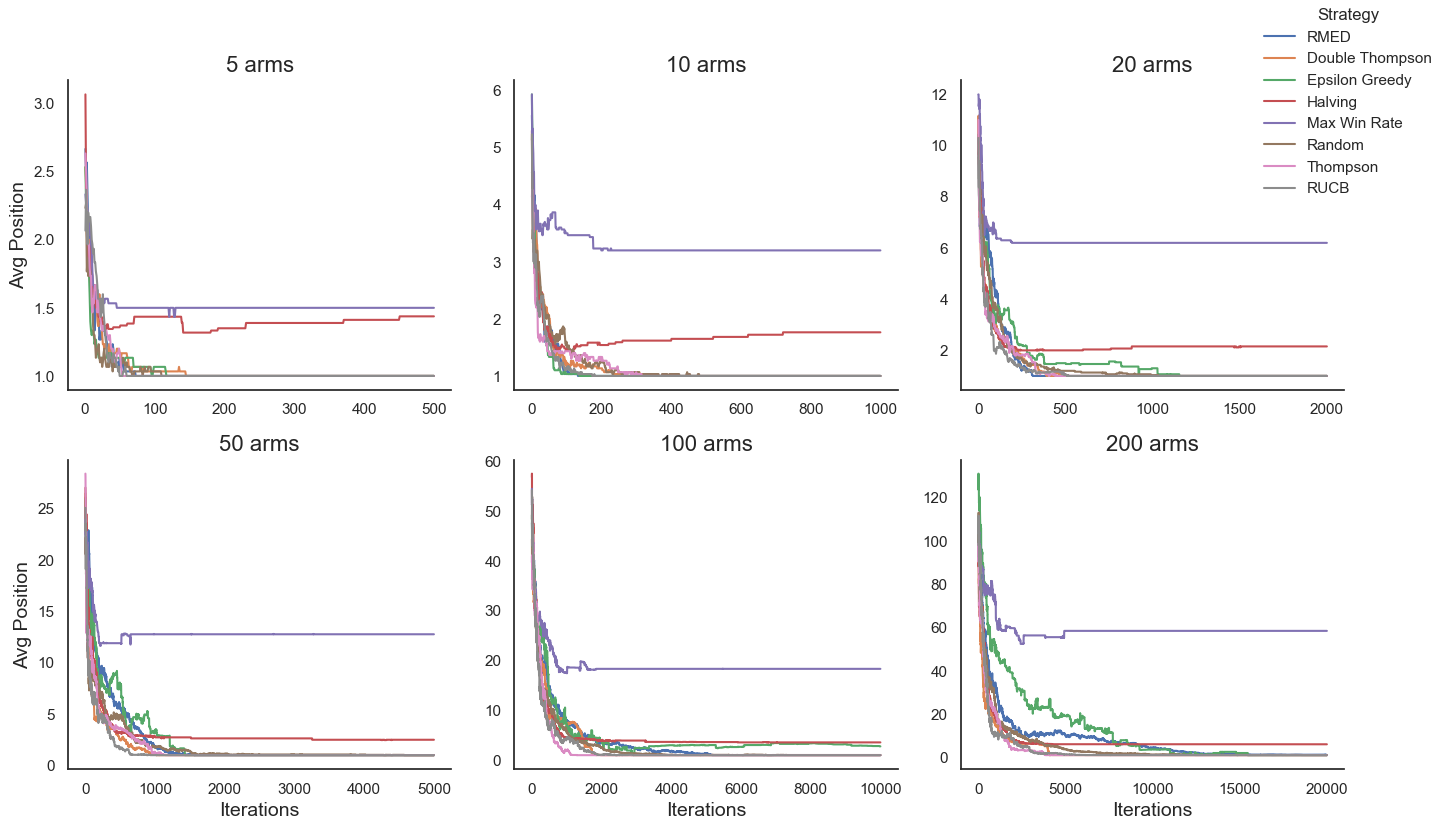

In [19]:


# Step 1: Compute average Position per Iteration per Strategy per Setup
avg_position_df = log_df.groupby(['Setup', 'Strategy', 'Iteration'])['Position'].mean().reset_index()

# Step 2: Plot
sns.set(style="white")

# Create a FacetGrid: one plot per setup
g = sns.FacetGrid(avg_position_df, col="Setup", hue="Strategy", col_wrap=3, height=4, sharey=False, sharex=False)

# Draw lineplot
g.map_dataframe(sns.lineplot, x="Iteration", y="Position")
g.add_legend()
# After g.add_legend()
g._legend.set_title('Strategy')

# Update legend labels
new_labels = ['RMED', 'Double Thompson', 'Epsilon Greedy', 'Halving','Max Win Rate','Random','Thompson','RUCB']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor((1.05, 0.91)) 

#g._legend.set_loc('upper right')
# Make it nice
g.set_axis_labels("Iterations", "Avg Position", fontsize=14)
g.set_titles(col_template="{col_name} arms")

# Adjust title font sizes manually
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=16)

g.fig.subplots_adjust(top=0.9)
#g.fig.suptitle("Average Position Across Runs Over Iterations by Strategy", fontsize=16)

plt.tight_layout()
plt.show()
